Módulo 2 - Coleta e Organização de Dados
========================================================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Antes de começar:
 - Crie uma cópia deste notebook, e o renomeie para "aula_1_modulo_2_{seu_nome}";
 - Caso seu ambiente Anaconda não possua uma das dependências necessárias para a execução do código contigo neste notebook, abra uma célula e execute o comando: ```!pip install -r ../requirements.txt```

Neste módulo vamos aprender sobre:
 1. **Como carregar dados de diferentes formatos em memória no nosso ambiente de desenvolvimento;**
 2. **Análise Exploratória;**
 3. **Tratamento de Dados;**
 4. Imputação de dados;
 5. Padronização de variáveis categóricas;
 6. Normalização e estandardização de variáveis contínuas;
 7. Particionamento de dados (Conjunto de treinamento e de validação).

1 - Carregando dados no ambiente de desenvolvimento
=============================================

No dia a dia de trabalho, um **Cientista de Dados** se depara com diferentes tipos fontes de dados. Nem sempre, em sua equipe, haverá um **Engenheiro de Dados** disponível para te ajudar a coletar dados de interesse em um formato fácil de integração com seu ambiente de desenvolvimento Python (ou qualquer outro ambiente de desenvolvimento científico), no nosso caso, o Jupyter Notebook. Portanto, é fundamental que você domine os principais formatos e/ou fontes existentes no mercado, para que não dependa de um terceiro para uma rápida prototipação/experimentação.

As principais fontes de dados, encontradas por um profissional da área, são:
 - Arquivos .csv;
 - Arquivos .json;
 - Arquivos .parquet;
 - Base de dados relacional SQL;
 - Base de dados não relacional NoSQL;

Em empresas que seguem a filosofia **Data Driven** haverá, usualmente, uma pedaço de Software chamado de *Camada de Ingestão de Dados*. Esta camada, desenvolvida por **Engenheiros de Dados**, tem por objetivo centralizar diversas fontes de informação bruta (arquivos csv, json, parquet, imagens, audios, etc ...) em um único repositório (ou **Buckets**). Este repositório centralizado recebe o nome de **Data Lake**, e é o ponto de partida para processos de ETL (*Extract, Transform and Load*), e também a forma mais fácil de um **Cientista de Dados** se servir de dados.

A consulta à base de dados SQL/NoSQL está fora do escopo deste módulo, contudo, com o domínio da linguagem Python para o processamento dos principais tipos de arquivo citados acima, . Tampouco trabalharemos, neste módulo, com processamento de imagens/audio.

1.1 - Arquivo .csv
----------------------

A existência de arquivos *csv* em **Data Lakes** não é predominante, pois, apesar de ser um arquivo fácil de se manipular, não é o mais eficiente (redução de espaço em disco e otimização de tempo de leitura). Entretanto, é o tipo de arquivo mais encontrado quando a informação ainda não está disponível no **Data Lake** (exportação de planilhas Excel, base de dados do IBGE, entre outras).

O arquivo csv é o melhor amigo do Pandas. Para carregar um arquivo em memória, utilizamos a função `read_csv`

```
dataset = pd.read_csv("caminho/do/arquivo.csv")
```

In [30]:
import pandas as pd
dados_csv = pd.read_csv("dados_brutos.csv")
dados_csv.head()

,localidade,tipo,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,Localidade 4,Tipo 1,0.081382,0.727021,3603.941384,2002.686030,1124.043113,0,0,4,123.0,731600
1,Localidade 4,Tipo 2,0.367980,0.145812,2185.209139,683.811862,2462.825432,0,0,13,143.0,318600
2,Localidade 3,Tipo 2,0.332654,0.432904,1025.698339,957.451552,1049.112117,0,0,12,150.0,1000800
3,Localidade 4,Tipo 1,0.159663,0.884596,NaN,3723.067390,1296.121182,0,0,8,160.0,678200
4,Localidade 3,Tipo 1,0.156154,0.836320,3925.306331,705.807343,4178.062758,0,0,12,134.0,1215100


1.2 - Arquivo .json
------------------------

É o formato mais utilizado por **Engenheiros de Software**, devido à sua compatibilidade com as tecnologias de desenvolvimento de APIs da atualidade. Consequentemente, a quantidade de arquivos *json* em **Data Lakes** é volumosa.

No *Pandas*, importa-se um arquivo *json* utilizando o comando `read_json`

In [31]:
dados_json = pd.read_json("dados_brutos.json")
dados_json.head()

,localidade,tipo,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,Localidade 2,Tipo 1,0.597638,0.325491,1022.322428,2686.710878,1725.924108,0,0,4,90.0,220500
1,Localidade 1,Tipo 1,0.027544,0.420417,2977.513666,3159.039997,3951.982126,1,0,9,98.0,739100
2,Localidade 2,Tipo 1,0.162819,0.400036,1682.849073,5074.219139,4462.207782,1,0,11,132.0,172600
3,Localidade 1,Tipo 2,0.278216,0.322245,830.383317,3474.922092,2180.415798,1,0,3,60.0,511000
4,Localidade 1,Tipo 2,0.592153,0.797530,3669.339129,950.780701,2588.959806,0,0,3,121.0,563700


1.3 - Arquivo .parquet
-------------------------------

É um formato de armazenamento colunar, disponível em todos os projetos do ecossistema *Hadoop*.
Em suma, um arquivo *parquet* permite armazenar e consultar o arquivo de forma eficiênte, o que justifica seu emprego na construção de **Data Lakes**.

https://parquet.apache.org/

A API do *Pandas* é intuitiva! Para carregar um arquivo *parquet*, utilizamos o método `pd.read_parquet` 

In [32]:
dados_parquet = pd.read_parquet("dados_brutos.parquet")
dados_parquet.head()

,localidade,tipo,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,Localidade 4,Tipo 2,0.195937,0.316041,751.709772,NaN,305.915315,0,0,18,136.0,304600
1,Localidade 1,Tipo 2,0.046575,0.672800,3949.517557,655.754522,2548.217574,1,0,26,98.0,331500
2,localidade 2,Tipo 1,0.673493,0.629134,2745.435105,2014.981615,1666.103996,0,0,1,80.0,227300
3,Localidade 4,Tipo 1,0.331288,0.567806,2689.566148,2398.266373,1756.442438,0,0,2,125.0,745700
4,Localidade 4,Tipo 2,0.677602,0.982486,8088.780703,3782.362838,5013.346910,1,0,9,117.0,295700


1.4 - Exercício
--------------------

Os dados da aula de hoje foram divididos em três arquivos, os quais carregamos nas células anteriores. Pesquise na documentação do *Pandas* como unir as linhas dos *dataframes* `dados_csv`, `dados_json` e `dados_parquet`, e um novo *dataframe* nominado `dados`.

https://pandas.pydata.org/docs/reference/index.html#api

Dica: **Concatenar** é a palavra chave de pesquisa

In [33]:
# Substitua a igualdade abaixo por uma que empilhe as linhas dos três conjuntos de 
# dados que carregamos anteriormente
dados = dados_csv.copy()

2 - Análise exploratória
===================

Agora que carregamos os dados no *notebook*, precisamos explorá-los para encontrar eventuais inconsistências.
No dia a dia de trabalho de um *Cientista de Dados*, é muito comum encontrar:
 - Campos nulos (NaN);
 - Variáveis nominais não padronizadas (ex: "MAÇA", "maça", "MACA", "Maca ");
 - Variáveis contínuas (intervalar ou de razão) fora de escala;
 - Preenchimento incorreto de campos (ex: Espera-se nome da fruta, mas campo foi preenchido com o nome da cor);
 
Dentre as etapas do processo de **Mineração de Dados**, a *limpeza* do conjunto de dados é a que despende maior tempo, e que tem papel chave quanto ao sucesso do projeto. Por quê? Como veremos adiante, alguns algoritmos de *Aprendizado de Máquina* são gulosos, ou seja, encontrarão uma resposta até mesmo para os ruídos presentes no seu conjunto de treinamento (conceito de *Overfitting*).

Vamos começar identificando que variáveis existem no conjunto, e seus respectivos tipos, utilizando os comandos:
  - `dtypes`: para verificar o tipo de cada coluna;
  - `sample(N)`: para coletar uma pequena amostra que pode nos ajudar a sanar dúvidas sobre os tipos;

In [34]:
dados.dtypes

localidade                object
tipo                      object
loc_x                    float64
loc_y                    float64
mercado_mais_proximo     float64
farmacia_mais_proxima    float64
escola_mais_proxima      float64
num_penit_4km              int64
num_penit_500m             int64
idade_imovel               int64
area                     float64
preco                      int64
dtype: object

In [35]:
dados.sample(5).T

,590,670,694,36,76
localidade,Localidade 1,Localidade 2,Localidade 4,Localidade 7,localidade 4
tipo,Tipo 2,Tipo 2,Tipo 1,Tipo 1,Tipo 2
loc_x,0.147311,0.194225,0.13125,0.622386,0.854212
loc_y,0.531163,0.41828,0.956201,0.0453222,0.622955
mercado_mais_proximo,2250.85,2011.22,5838.66,4571.62,5781.68
farmacia_mais_proxima,2361.99,4724.4,4347.14,5963.92,2891.63
escola_mais_proxima,3877.98,4102.87,1534.1,2028.01,2006.57
num_penit_4km,1,1,0,0,0
num_penit_500m,0,0,0,0,0
idade_imovel,12,1,17,8,2


Nosso conjunto de dados representa uma base imobiliária, e é formado pelas seguintes colunas:

| Nome                  | Descrição                                              | Tipo               |
| ------------------    | ------------------------------------------------------ | ------------------ |
| localidade            | A localidade do imóvel                                 | object (string)    |
| tipo                  | O tipo do imóvel                                       | object (string)    |
| loc_x                 | Coordenada x do imóvel em um mapa local de referência  | float64            |
| loc_y                 | Coordenada y do imóvel em um mapa local de referência  | float64            |
| mercado_mais_proximo  | Distância do mercado mais próximo, em metros           | float64            |
| farmacia_mais_proxima | Distância da farmácia mais próxima, em metros          | float64            |
| escola_mais_proxima   | Distância da escola mais próxima, em metros            | float64            |
| num_penit_4km         | Número de penitenciárias em um raio de 4km do imóvel   | int64              |
| num_penit_500m        | Número de penitenciárias em um raio de 500m do imóvel  | int64              |
| idade_imovel          | Idade do imóvel                                        | int64              |
| area                  | Área do imóvel, em $m^2$                               | float64            |
| preco                 | O preço do imóvel, em R$                               | int64              |

* O tipo `int64`, no *Python*, representa o conjunto dos números naturais $\mathbb{N}$
* O tipo `float64`, no *Python*, representa o conjunto dos números reais $\mathbb{R}$
* O tipo `object`, no *Python*, pode representar uma **string** ou uma estrutura de dados composta (`list`, `dict`, classes customizadas, entre outras)

Não existe uma receita de bolo exata para tratamento de dados, uma vez natureza das variáveis coletadas varia muito de problema à problema. Para este caso de estudo, vamos começar verificando o conteúdo das variáveis de tipo `object`. Como já sabemos que estes campos estão armazenando valores do tipo `string`, uma boa pergunta inicial seria: Quais os possíveis valores destes campo?

Para responder a esta pergunta, podemos utilizar a função `unique`:

In [36]:
# Valores únicos de localidade (incluíndo valores nulos, i.e., NaN)
dados.localidade.unique()

array(['Localidade 4', 'Localidade 3', 'localidade 4', 'Localidade 2',
       'Localidade 9', 'Localidade 1', 'Localidade 7', 'localidade 3',
       'LOCALIDADE 2', 'localidade 1', 'LOCALIDADE 1', nan,
       'Localidade 8', 'Tipo 3', 'localidade 2', 'LOCALIDADE 3',
       'localidade 9', 'LOCALIDADE 4', 'Tipo 2', 'Localidade 5',
       'Localidade 6', 'localidade 5'], dtype=object)

E quanto às variáveis do tipo `int64` ou `float64`?
Podemos descobrir o número de valores não nulos (`count`), a média (`mean`), e o desvio padrão (`std`), os valores máximo e mínimo (`min`, `max`), e os percentils (`25%`, `50%`, `75%`) usando a função `describe`:

In [37]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
loc_x,899.0,0.502272,0.286854,0.000530,0.248081,0.499401,0.741024,9.983200e-01
loc_y,899.0,0.499041,0.288729,0.000887,0.245830,0.512433,0.743005,9.981711e-01
mercado_mais_proximo,873.0,3033.377238,1705.471518,37.932408,1788.046944,2777.844902,4011.653788,9.733443e+03
farmacia_mais_proxima,875.0,2757.540424,1546.552493,186.963389,1557.581680,2508.180273,3737.584609,8.063493e+03
escola_mais_proxima,869.0,2397.936232,1332.285680,63.839485,1396.464027,2161.502876,3223.327892,7.336996e+03
num_penit_4km,899.0,0.310345,0.470054,0.000000,0.000000,0.000000,1.000000,2.000000e+00
num_penit_500m,899.0,0.007786,0.087945,0.000000,0.000000,0.000000,0.000000,1.000000e+00
idade_imovel,899.0,14.925473,12.487945,0.000000,5.000000,11.000000,20.000000,5.000000e+01
area,877.0,124.765108,40.613329,54.000000,92.000000,121.000000,154.000000,2.330000e+02
preco,899.0,487069.187987,249639.561809,144000.000000,295300.000000,448500.000000,635250.000000,1.467700e+06


**O que é quantil/percentil/quartil?**

Quantils são pontos estabelecidos em intervalos regulares em uma lista ordenada que informa o percentual de dados abaixo de um limiar em uma amostra.

Exemplo de cálculo de quantil:

Dada uma lista de valores desordenados $[5, 3, 1, 10, 4]$ o quantil nos diz o número índice da lista no qual $x$% da população (elementos da lista) são menores do que o valor apontado pelo índice. Por exemplo, se ordenarmos a lista de forma crescente, obtemos $[1, 3, 4, 5, 10]$.

Para calcular o quantil 0.5 (equivalente a mediana, e também ao segundo quartil), basta encontrar o índice central da lista. Nesta caso, a lista contém 5 elementos, sendo o índice 3 seu elemento central. Logo, nosso $q_{0.5} = 4$, significando que 50% dos dados de nossa amostra são menores que 4.

Equivalências:

| Quantil | Quartil | Percentil |
| ------- | ------- | --------- |
| 0.25    | 1       | 25%       |
| 0.5     | 2       | 50%       |
| 0.75    | 3       | 75%       |

A combinação de quantils com outras propriedades de uma amostra (como a média, valor mínimo, máximo e variância) nos fornece uma visão precisa da distribuição dos dados sob observação. Com o auxílio da biblioteca `seaborn`, podemos criar representação pictóricas destas informações, como no caso do Diagrama de Caixas (`boxplot`) e o Diagrama Violino (`violinplot`) apresentado abaixo: 


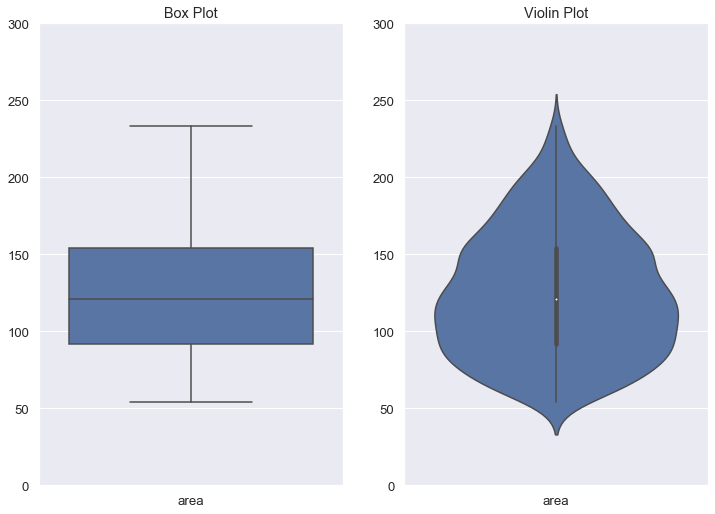

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustando o tamanho padrão das imagens e fontes
sns.set(font_scale=1.2, rc={
    "figure.figsize": (12, 8.5),
})

ax = plt.subplot(121)
sns.boxplot(data=dados[["area"]], ax=ax)
plt.title("Box Plot"); plt.ylim([0, 300]);

ax = plt.subplot(122)
sns.violinplot(data=dados[["area"]], ax=ax)
plt.title("Violin Plot"); plt.ylim([0, 300]);

Podemos utilizar o argumento `hue` do `seaborn` para segmentar visualizações por categorias distintas com o emprego de cores.

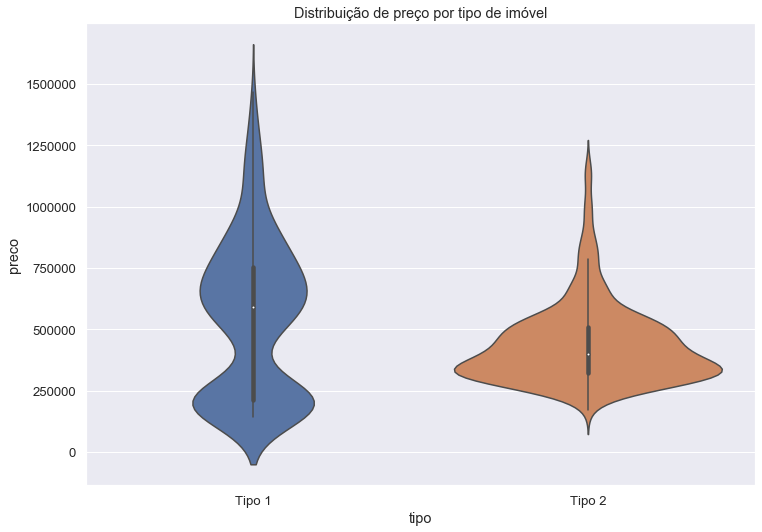

In [39]:
fig, ax = plt.subplots()
sns.violinplot(
    data=dados[dados.tipo.isin(["Tipo 1", "Tipo 2"])][["preco", "tipo"]], 
    y="preco", 
    x="tipo", 
    ax=ax
)
plt.title("Distribuição de preço por tipo de imóvel");

Além da distribuição das variáveis do nosso conjunto de dados (Análise Descritiva Univariada), podemos explorar relações entre pares utilizando a visualização `pairplot` do `seaborn` (Análise Descritiva Multivariada), que combina Funções de Densidade de Probabilidade (FDP, em inglês, *Probability Density Function*) com Gráficos de Disperção (`scatterplot`), como demonstrado na célula a seguir.

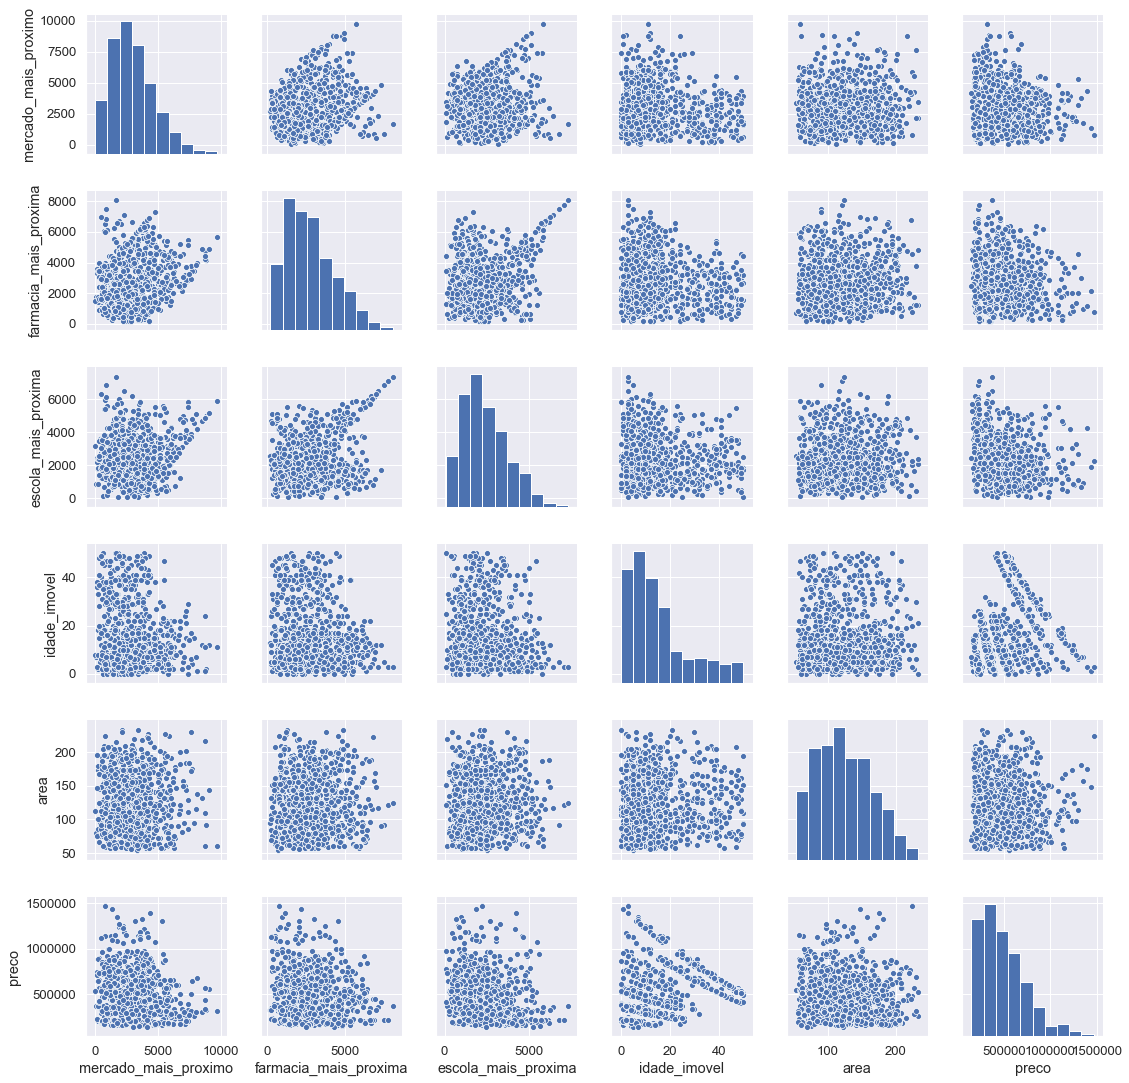

In [40]:
# A função .drop descarta algumas colunas do nosso DataFrame
sns.pairplot(
    dados.drop(columns=["loc_x", "loc_y", "num_penit_4km", "num_penit_500m"])
)

Utilizando a função `corr` do **Pandas**, junto com a visualização de mapa de calor do `heatmap` do `seaborn`, é possível criar um correlograma para mensurar, visualmente, as correlações entre as variáveis do conjunto de dados. Um adendo: a função `corr` admite apenas valores numéricos. Para contornar esse problema, podemos usar a função `select_dtypes` com o argumento `exclude="object"` para selecionar todas as colunas em que o tipo é diferente de `object`, ou seja, apenas as colunas que contém valores numéricos.

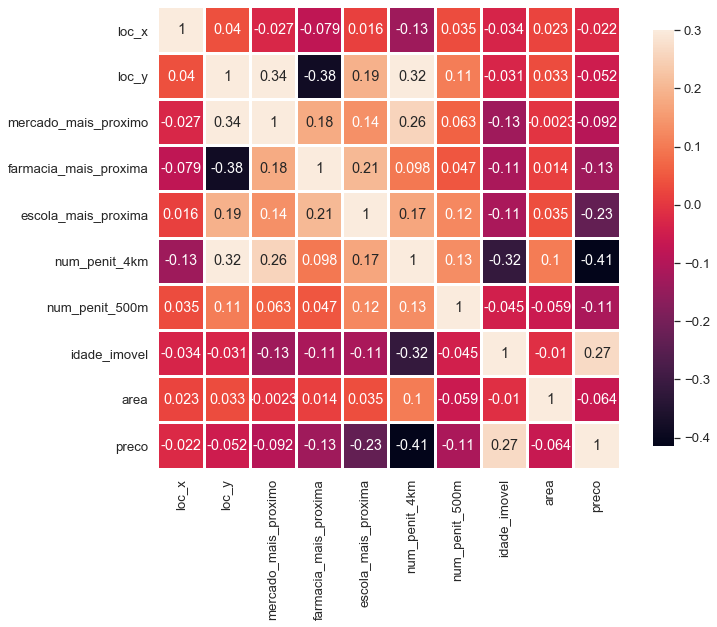

In [41]:
corr = dados.select_dtypes(exclude="object").corr()
sns.heatmap(corr, 
            annot=True,
            square=True, 
            vmax=.3, 
            linewidths=2, 
            cbar_kws={"shrink": .9})

2.1 Exercício
------------------

Realize uma Análise Exploratória Univariada nas demais variáveis deste conjunto de dados.

In [56]:
# Espaço para a análise exploratória univariada.
dados.columns

Index(['localidade', 'tipo', 'loc_x', 'loc_y', 'mercado_mais_proximo',
       'farmacia_mais_proxima', 'escola_mais_proxima', 'num_penit_4km',
       'num_penit_500m', 'idade_imovel', 'area', 'preco'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E81B6BA88>,
      dtype=object)

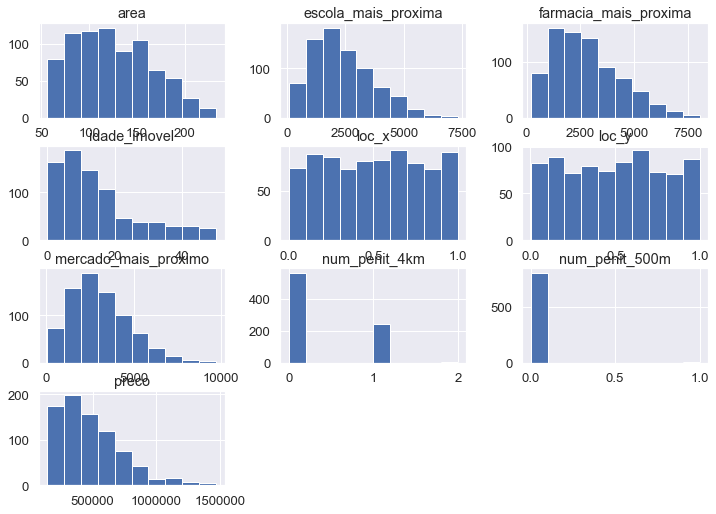

In [57]:
#Histograma
dados.hist()

In [59]:
#Summary

dados.describe()

,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
count,807.000000,807.000000,785.000000,783.000000,780.000000,807.000000,807.000000,807.000000,788.000000,8.070000e+02
mean,0.504878,0.495613,3064.718742,2785.628926,2394.616332,0.307311,0.008674,14.724907,125.362944,4.839820e+05
std,0.288789,0.290780,1717.670341,1553.917080,1340.507752,0.467009,0.092788,12.210465,41.090383,2.487823e+05
min,0.000530,0.000887,37.932408,186.963389,63.839485,0.000000,0.000000,0.000000,56.000000,1.440000e+05
25%,0.239439,0.239798,1798.915576,1597.047723,1391.647575,0.000000,0.000000,5.000000,92.000000,2.962500e+05
50%,0.510357,0.510150,2807.010682,2538.437903,2154.651313,0.000000,0.000000,11.000000,121.000000,4.379000e+05
75%,0.746136,0.739912,4090.446176,3754.298466,3241.815208,1.000000,0.000000,20.000000,155.000000,6.253000e+05
max,0.998320,0.998171,9733.443096,8063.492978,7336.995648,2.000000,1.000000,50.000000,233.000000,1.467700e+06


3 - Tratamento dos dados - Exercício para o final de semana
================================================

O conjunto de dados imobiliários contém alguns registros de **localidades** e **tipos** de imóvel pouco observados e/ou incorretos.  

**Missão**: Remova estes registros minoritários e/ou incorretos do conjunto de dados, e persista o resultado em um arquivo `csv` chamado "dados_tratados.csv". Este arquivo será o ponto de partida da nossa próxima aula.

Dicas: Estude, por meio da documentação do **Pandas**, o que faz a função `value_counts(dropna=False)`



In [43]:
#Colunas
dados.columns

Index(['localidade', 'tipo', 'loc_x', 'loc_y', 'mercado_mais_proximo',
       'farmacia_mais_proxima', 'escola_mais_proxima', 'num_penit_4km',
       'num_penit_500m', 'idade_imovel', 'area', 'preco'],
      dtype='object')

In [44]:
### 1. Corrigindo $localidade

dados['localidade'].unique()

array(['Localidade 4', 'Localidade 3', 'localidade 4', 'Localidade 2',
       'Localidade 9', 'Localidade 1', 'Localidade 7', 'localidade 3',
       'LOCALIDADE 2', 'localidade 1', 'LOCALIDADE 1', nan,
       'Localidade 8', 'Tipo 3', 'localidade 2', 'LOCALIDADE 3',
       'localidade 9', 'LOCALIDADE 4', 'Tipo 2', 'Localidade 5',
       'Localidade 6', 'localidade 5'], dtype=object)

In [45]:
# 1.1 Deixando os valores lower case

dados['localidade'] = dados['localidade'].str.lower()
dados['localidade'].unique()

array(['localidade 4', 'localidade 3', 'localidade 2', 'localidade 9',
       'localidade 1', 'localidade 7', nan, 'localidade 8', 'tipo 3',
       'tipo 2', 'localidade 5', 'localidade 6'], dtype=object)

In [46]:
# 1.2 Drop de registros incorretos
#NaN
dados = dados.dropna(subset=['localidade'])
#Tipo 2 e Tipo 3
dados = dados[~dados['localidade'].isin(['tipo 3', 'tipo 2'])]
dados['localidade'].unique()

array(['localidade 4', 'localidade 3', 'localidade 2', 'localidade 9',
       'localidade 1', 'localidade 7', 'localidade 8', 'localidade 5',
       'localidade 6'], dtype=object)

In [47]:
#1.3 Valores pouco observados
dados['localidade'].value_counts()

localidade 4    220
localidade 2    211
localidade 1    208
localidade 3    208
localidade 8      3
localidade 5      3
localidade 7      3
localidade 6      2
localidade 9      2
Name: localidade, dtype: int64

In [48]:
dados = dados[~dados['localidade'].isin(['localidade 8', 'localidade 5', 'localidade 7', 'localidade 6', 'localidade 9'])]
dados['localidade'].value_counts()

localidade 4    220
localidade 2    211
localidade 1    208
localidade 3    208
Name: localidade, dtype: int64

In [49]:
### 2. Corrigindo $tipo

dados['tipo'].unique()

array(['Tipo 1', 'Tipo 2', 'TIPO 1', 'tipo 2', nan, 'TIPO 2',
       'LOCALIDADE 6', 'Localidade 9', 'Localidade 8', 'tipo 1',
       'Localidade 6', 'Tipo 3', 'Tipo 4'], dtype=object)

In [50]:
# 2.1 Deixando os valores lower case

dados['tipo'] = dados['tipo'].str.lower()
dados['tipo'].unique()

array(['tipo 1', 'tipo 2', nan, 'localidade 6', 'localidade 9',
       'localidade 8', 'tipo 3', 'tipo 4'], dtype=object)

In [51]:
# 2.2 Drop de registros incorretos
#NaN
dados = dados.dropna(subset=['tipo'])
#Tipo 2 e Tipo 3
dados = dados[~dados['tipo'].isin(['localidade 6', 'localidade 9', 'localidade 8'])]
dados['tipo'].unique()

array(['tipo 1', 'tipo 2', 'tipo 3', 'tipo 4'], dtype=object)

In [53]:
#2.3 Valores pouco observados
dados['tipo'].value_counts()

tipo 2    440
tipo 1    367
tipo 3      2
tipo 4      2
Name: tipo, dtype: int64

In [54]:
dados = dados[~dados['tipo'].isin(['tipo 3', 'tipo 4'])]
dados['tipo'].value_counts()

tipo 2    440
tipo 1    367
Name: tipo, dtype: int64

In [55]:
### 3. Salvando resultado em CSV
file_name = 'dados_tratados.csv'
dados.to_csv(file_name, sep=';', encoding='utf-8')